# German Traffic Sign Dataset

Second notebook of German Traffic dataset study. In this notebook, I have implemented LeNet CNN architecture.

In [1]:
import keras
import pickle
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
%matplotlib inline

/Users/kathan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/kathan/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


# 1. Load Dataset

In [2]:
# Loading train and test dataset

with open('original_traffic_set/train.p',mode = 'rb') as f:
    train_data = pickle.load(f)
    
X_train,y_train = train_data['features'],train_data['labels']

with open('original_traffic_set/valid.p','rb') as ft:
    valid_data = pickle.load(ft)
    
X_valid,y_valid = valid_data['features'],valid_data['labels']

with open('original_traffic_set/test.p','rb') as ft:
    test_data = pickle.load(ft)
    
X_test,y_test = test_data['features'],test_data['labels']


# 2. Explore Dataset

In [3]:
print (X_train.shape,y_train.shape)
print (X_valid.shape,y_valid.shape)
print (X_test.shape,y_test.shape)

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


In [4]:
number_classes = len(np.unique(y_train))
unique_train, counts_train = np.unique(y_train, return_counts=True)

print ("Number of classes: ", unique_train)
print ()
print ("Counts in each class: ", counts_train)

Number of classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

Counts in each class:  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


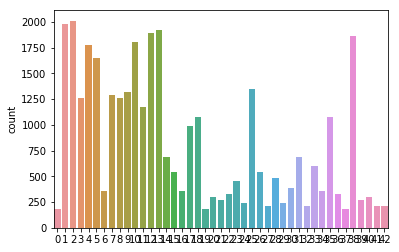

In [5]:
sns.countplot(y_train,label="Count")
plt.show()

## Observations
    1. Dataset has around ~35k train images with 43 classes
    2. From above figure, we can say that dataset is unbalanced with lowest class value 180 and highest 2010. We have to balance these data.
    

## Visulizing train images with labels

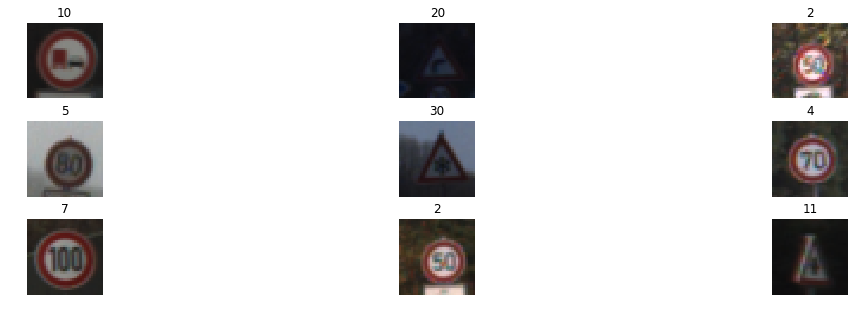

In [6]:
import random
fig,axs = plt.subplots(3,3,figsize=(20,5))
fig.subplots_adjust(hspace = .3,wspace=.005)
axs = axs.ravel()

for i in range(9):
    index = random.randint(0,len(X_train))
    img = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(img)
    axs[i].set_title(y_train[index])

# 3. Define Model

Here I have implemented LeNet based CNN architecture.

![LeNet](lenet.jpg)

http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

In [7]:
model = Sequential()
model.add(Conv2D(20,5,padding="same",input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(50,5,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))

In [8]:
#Preprocess Data
X_train_normal = X_train/255.0 - 0.5
X_valid_normal = X_valid/255.0 - 0.5

from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
y_train_one_hot = labelbinarizer.fit_transform(y_train)
y_valid_one_hot = labelbinarizer.fit_transform(y_valid)




In [9]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [10]:


history = model.fit(X_train_normal, y_train_one_hot, nb_epoch=20,validation_data=(X_valid_normal,y_valid_one_hot))

/Users/kathan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 104s 3ms/step - loss: 1.0847 - acc: 0.6858 - val_loss: 0.4169 - val_acc: 0.8859
Epoch 2/20
34799/34799 [==============================] - 110s 3ms/step - loss: 0.2441 - acc: 0.9239 - val_loss: 0.3034 - val_acc: 0.9098
Epoch 3/20
34799/34799 [==============================] - 129s 4ms/step - loss: 0.1475 - acc: 0.9544 - val_loss: 0.2547 - val_acc: 0.9290
Epoch 4/20
34799/34799 [==============================] - 164s 5ms/step - loss: 0.1143 - acc: 0.9647 - val_loss: 0.2201 - val_acc: 0.9361
Epoch 5/20
34799/34799 [==============================] - 171s 5ms/step - loss: 0.0966 - acc: 0.9709 - val_loss: 0.2783 - val_acc: 0.9279
Epoch 6/20
34799/34799 [==============================] - 178s 5ms/step - loss: 0.0838 - acc: 0.9739 - val_loss: 0.2543 - val_acc: 0.9415
Epoch 7/20
34799/34799 [==============================] - 165s 5ms/step - loss: 0.0847 - acc: 0.9747 - val_loss: 0.2830 - v

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])


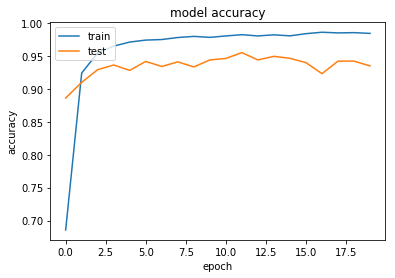

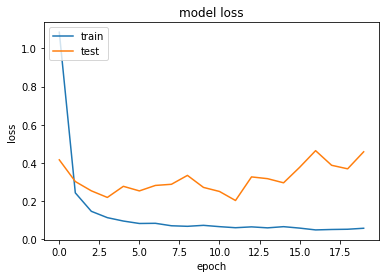

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
print (X_test_normal.shape)
print (y_test.shape)
y_test_one_hot = labelbinarizer.fit_transform(y_test)
X_test_normal = X_test/255.0 - 0.5
score, acc = model.evaluate(X_test_normal, y_test_one_hot,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

(12630, 32, 32, 3)
(12630,)
12630/12630 [==============================] - 10s 787us/step
Test score: 0.39378511732909205
Test accuracy: 0.9368171021283287


# 4. Conclusion

In this notebook, I have implemented LeNet architecture and trained the model on 20 epochs we are getting ~93% accuracy on test data with this setting.

From the above graph it seems that model is overfitting after 12 epochs (Loss is increasing and validation accuracy decreasing)

It seems we need deeper architecture, data augmentation to avoid overfitting and I will try data balancing in next notebook.
